<a href="https://colab.research.google.com/github/RhoGitHub754/Life-Expectancy-and-GDP/blob/main/life_expectancy_gdp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Life Expectancy and GDP


---





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
# pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Load the Data
I will load the CSV file, all_data.csv which contains data on GDP and life expectancy within different countries.

Open all_data.csv with pandas.

In [19]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Codecademy - Data Analyst Portfolio/Life-Expectancy-and-GDP-Starter/all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.30000,77860932152.00000
1,Chile,2001,77.30000,70979923960.00000
2,Chile,2002,77.80000,69736811435.00000
3,Chile,2003,77.90000,75643459840.00000
4,Chile,2004,78.00000,99210392858.00000


In [4]:
df.columns

Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')

I have printed the first 10 rows of data,

The dataset provided has the following columns of data:

**Country** - nation

**Year** - the year for the observation

**Life** expectancy at birth (years) - life expectancy value in years

**GDP** - Gross Domestic Product in U.S. dollars

## Data Inspection


Life expectancy at birth (years) for a column name is too wordy (and slightly mobid), I will change this to LE.

In [20]:
df.rename({'Life expectancy at birth (years)': 'LE'}, axis=1, inplace=True)

df.tail()

,Country,Year,LE,GDP
91,Zimbabwe,2011,54.90000,12098450749.00000
92,Zimbabwe,2012,56.60000,14242490252.00000
93,Zimbabwe,2013,58.00000,15451768659.00000
94,Zimbabwe,2014,59.20000,15891049236.00000
95,Zimbabwe,2015,60.70000,16304667807.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  96 non-null     object 
 1   Year     96 non-null     int64  
 2   LE       96 non-null     float64
 3   GDP      96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


All columns contain the following data types: float, int, and object, Which seems correct. Country is the only string and the rest are numbers

## Numerical Summerization

In [21]:
df.describe()

,Year,LE,GDP
count,96.00000,96.00000,96.00000
mean,2007.50000,72.78958,3880498570768.39600
std,4.63397,10.67288,5197561310975.91699
min,2000.00000,44.30000,4415702800.00000
25%,2003.75000,74.47500,173301750000.00000
50%,2007.50000,76.75000,1280220000000.00000
75%,2011.25000,78.90000,4067510000000.00000
max,2015.00000,81.00000,18100000000000.00000


## Life Expectancy

From the dataset numerical summerisation we can see that the average life expectancy across all countries is 73 years, lowest is 44 years. We can also see from the quantile ranges that all of the life expectancies are between 74 and 79 years.

## GDP

Average country GDP is 3880498570768 (3880 Billion), smallest GDP is 4415702800 (4 Billion), which is a huge difference. The quartiles of GDP range from 173B to 4067B.

In [8]:
df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [9]:
df.Country.describe()

count        96
unique        6
top       China
freq         16
Name: Country, dtype: object

## Data Visualization

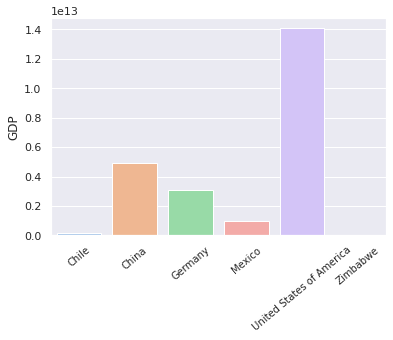

In [10]:
sns.set_theme('notebook', 'darkgrid', 'pastel')
gdp_mean = df.groupby('Country').GDP.mean()

sns.barplot(x = df.Country.unique(), y = gdp_mean)
plt.xticks(rotation = (40), fontsize = 10)
plt.show()

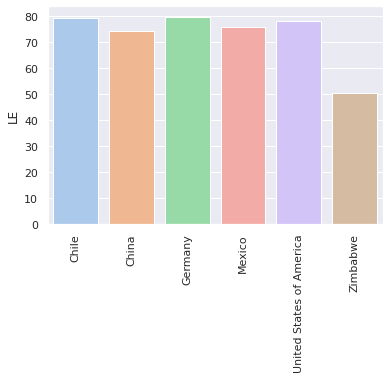

In [11]:
le_mean = df.groupby('Country').LE.mean()

sns.barplot(x=df.Country.unique(), y=le_mean)
plt.xticks(rotation = (90))
plt.show()

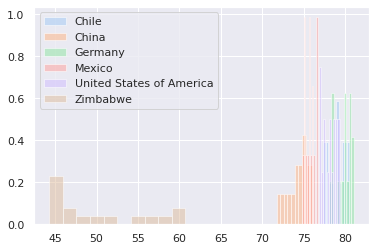

In [12]:
plt.clf()
plt.hist(df.LE[df.Country == 'Chile'], label='Chile', alpha=0.5, density=True)
plt.hist(df.LE[df.Country == 'China'], label='China', alpha=0.5, density=True)
plt.hist(df.LE[df.Country == 'Germany'], label='Germany', alpha=0.5, density=True)
plt.hist(df.LE[df.Country == 'Mexico'], label='Mexico', alpha=0.5, density=True)
plt.hist(df.LE[df.Country == 'United States of America'], label='United States of America', alpha=0.5, density=True)
plt.hist(df.LE[df.Country == 'Zimbabwe'], label='Zimbabwe', alpha=0.5, density=True)
plt.legend()
plt.show()

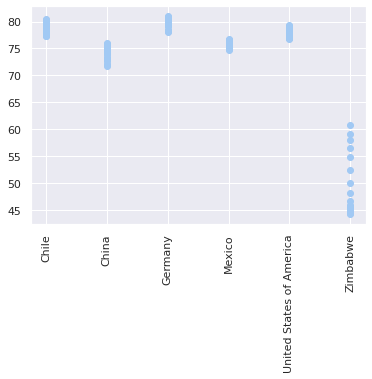

In [13]:
plt.scatter(df.Country, df.LE)
plt.xticks(rotation = (90))
plt.show()

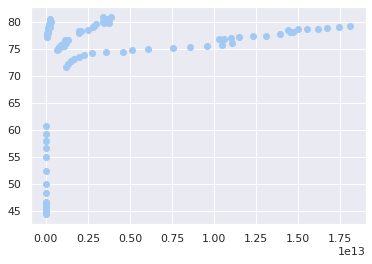

In [14]:
plt.scatter(df.GDP, df.LE)
plt.show()

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


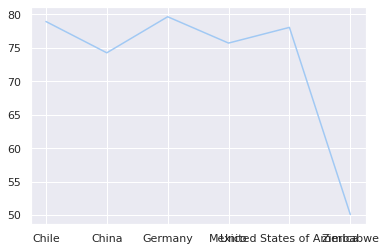

In [15]:
print(df.Country.unique())
plt.plot(df.Country.unique(), le_mean)
plt.show()

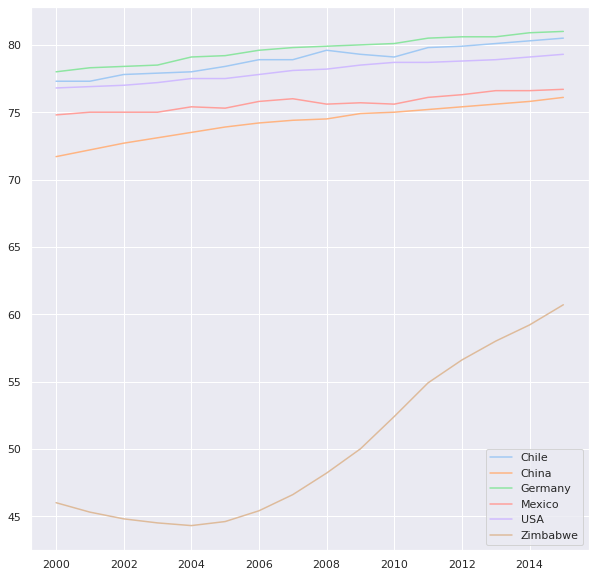

In [16]:
Chile = df[df.Country == 'Chile']
China = df[df.Country == 'China']
Germany = df[df.Country == 'Germany']
Mexico = df[df.Country == 'Mexico']
America = df[df.Country == 'United States of America']
Zimbabwe = df[df.Country == 'Zimbabwe']

f, ax = plt.subplots(figsize=(10, 10))
ax.plot(Chile.Year, Chile.LE, label='Chile')
ax.plot(China.Year, China.LE, label='China')
ax.plot(Germany.Year, Germany.LE, label='Germany')
ax.plot(Mexico.Year, Mexico.LE, label='Mexico')
ax.plot(America.Year, America.LE, label='USA')
ax.plot(Zimbabwe.Year, Zimbabwe.LE, label='Zimbabwe')
plt.legend()
plt.show()

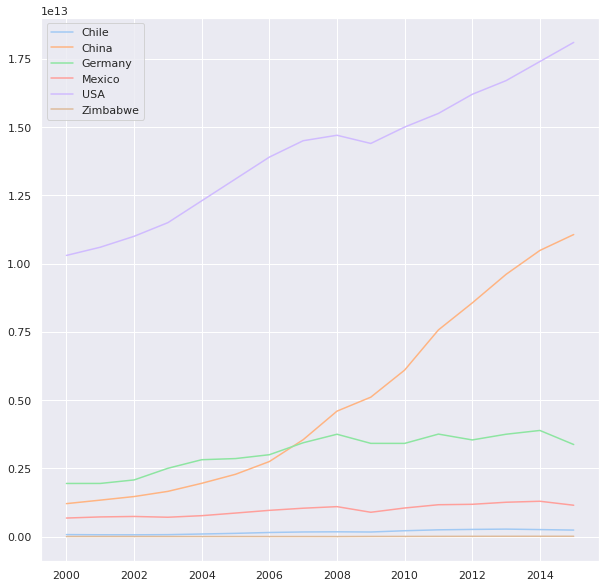

In [17]:
Chile = df[df.Country == 'Chile']
China = df[df.Country == 'China']
Germany = df[df.Country == 'Germany']
Mexico = df[df.Country == 'Mexico']
America = df[df.Country == 'United States of America']
Zimbabwe = df[df.Country == 'Zimbabwe']

f, ax = plt.subplots(figsize=(10, 10))
ax.plot(Chile.Year, Chile.GDP, label='Chile')
ax.plot(China.Year, China.GDP, label='China')
ax.plot(Germany.Year, Germany.GDP, label='Germany')
ax.plot(Mexico.Year, Mexico.GDP, label='Mexico')
ax.plot(America.Year, America.GDP, label='USA')
ax.plot(Zimbabwe.Year, Zimbabwe.GDP, label='Zimbabwe')
plt.legend()
plt.show()